# Regression- Predict Employee Salary


In [1]:
#import required packages
import pandas as pd
import numpy as np

In [2]:
#Data for Regression is read into a dataframe and displayed first 30 records 
df = pd.read_csv('regression.csv')
df.head(30)

,Employee_Name,EmpID,EmpStatusID,Salary,Termd,DOB,Gender,MaritalDesc,CitizenDesc,DateofHire,DateofTermination,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,1.0,62506,0,7/10/1983,M,Single,US Citizen,7/5/2011,NaN,Exceeds,4.60,5,0,0,1
1,"Ait Sidi, Karthikeyan",10084,5.0,104437,1,5/5/1975,M,Married,US Citizen,3/30/2015,6/16/2016,Fully Meets,4.96,3,6,0,17
2,"Akinkuolie, Sarah",10196,5.0,64955,1,9/19/1988,F,Married,US Citizen,7/5/2011,9/24/2012,Fully Meets,3.02,3,0,0,3
3,"Alagbe,Trina",10088,1.0,64991,0,9/27/1988,F,Married,US Citizen,1/7/2008,NaN,Fully Meets,4.84,5,0,0,15
4,"Anderson, Carol",10069,5.0,50825,1,9/8/1989,F,Divorced,US Citizen,7/11/2011,9/6/2016,Fully Meets,5.00,4,0,0,2
5,"Anderson, Linda",10002,1.0,57568,0,5/22/1977,F,Single,US Citizen,1/9/2012,NaN,Exceeds,5.00,5,0,0,15
6,"Andreola, Colby",10194,1.0,95660,0,5/24/1979,F,Single,US Citizen,11/10/2014,NaN,Fully Meets,3.04,3,4,0,19
7,"Athwal, Sam",10062,1.0,59365,0,2/18/1983,M,Widowed,US Citizen,9/30/2013,NaN,Fully Meets,5.00,4,0,0,19
8,"Bachiochi, Linda",10114,3.0,47837,0,2/11/1970,F,Single,US Citizen,7/6/2009,NaN,Fully Meets,4.46,3,0,0,4
9,"Bacong, Alejandro",10250,1.0,50178,0,1/7/1988,M,Divorced,US Citizen,1/5/2015,NaN,Fully Meets,5.00,5,6,0,16


In [3]:
df[['DateofHire', 'DateofTermination']] = df[['DateofHire', 'DateofTermination']].apply(pd.to_datetime)
print(df.dtypes)

Employee_Name                   object
EmpID                            int64
EmpStatusID                    float64
Salary                           int64
Termd                            int64
DOB                             object
Gender                          object
MaritalDesc                     object
CitizenDesc                     object
DateofHire              datetime64[ns]
DateofTermination       datetime64[ns]
PerformanceScore                object
EngagementSurvey               float64
EmpSatisfaction                  int64
SpecialProjectsCount             int64
DaysLateLast30                   int64
Absences                         int64
dtype: object


In [4]:
df["DateofTermination"] = df["DateofTermination"].replace(np.nan, pd.to_datetime('1/1/2022'))

In [5]:
df

,Employee_Name,EmpID,EmpStatusID,Salary,Termd,DOB,Gender,MaritalDesc,CitizenDesc,DateofHire,DateofTermination,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,1.0,62506,0,7/10/1983,M,Single,US Citizen,2011-07-05,2022-01-01,Exceeds,4.60,5,0,0,1
1,"Ait Sidi, Karthikeyan",10084,5.0,104437,1,5/5/1975,M,Married,US Citizen,2015-03-30,2016-06-16,Fully Meets,4.96,3,6,0,17
2,"Akinkuolie, Sarah",10196,5.0,64955,1,9/19/1988,F,Married,US Citizen,2011-07-05,2012-09-24,Fully Meets,3.02,3,0,0,3
3,"Alagbe,Trina",10088,1.0,64991,0,9/27/1988,F,Married,US Citizen,2008-01-07,2022-01-01,Fully Meets,4.84,5,0,0,15
4,"Anderson, Carol",10069,5.0,50825,1,9/8/1989,F,Divorced,US Citizen,2011-07-11,2016-09-06,Fully Meets,5.00,4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,1.0,65893,0,5/11/1985,M,Single,US Citizen,2014-07-07,2022-01-01,Fully Meets,4.07,4,0,0,13
307,"Ybarra, Catherine",10301,5.0,48513,1,5/4/1982,F,Single,US Citizen,2008-09-02,2015-09-29,PIP,3.20,2,0,5,4
308,"Zamora, Jennifer",10010,1.0,220450,0,8/30/1979,F,Single,US Citizen,2010-04-10,2022-01-01,Exceeds,4.60,5,6,0,16
309,"Zhou, Julia",10043,1.0,89292,0,2/24/1979,F,Single,US Citizen,2015-03-30,2022-01-01,Fully Meets,5.00,3,5,0,11


In [6]:
df.head()

,Employee_Name,EmpID,EmpStatusID,Salary,Termd,DOB,Gender,MaritalDesc,CitizenDesc,DateofHire,DateofTermination,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,1.0,62506,0,7/10/1983,M,Single,US Citizen,2011-07-05,2022-01-01,Exceeds,4.60,5,0,0,1
1,"Ait Sidi, Karthikeyan",10084,5.0,104437,1,5/5/1975,M,Married,US Citizen,2015-03-30,2016-06-16,Fully Meets,4.96,3,6,0,17
2,"Akinkuolie, Sarah",10196,5.0,64955,1,9/19/1988,F,Married,US Citizen,2011-07-05,2012-09-24,Fully Meets,3.02,3,0,0,3
3,"Alagbe,Trina",10088,1.0,64991,0,9/27/1988,F,Married,US Citizen,2008-01-07,2022-01-01,Fully Meets,4.84,5,0,0,15
4,"Anderson, Carol",10069,5.0,50825,1,9/8/1989,F,Divorced,US Citizen,2011-07-11,2016-09-06,Fully Meets,5.00,4,0,0,2


In [7]:
df['years_of_tenure']=df['DateofTermination'].dt.year- df['DateofHire'].dt.year

In [8]:
df['Age']= 2022 - pd.DatetimeIndex(df['DOB']).year

In [9]:
df.drop("DateofTermination",axis=1,inplace=True)

In [10]:
df.drop("DateofHire",axis=1,inplace=True)
df.drop("DOB",axis=1,inplace=True)

In [11]:
df['EmpStatusID'].fillna(df['EmpStatusID'].mode()[0], inplace=True)
df['MaritalDesc'].fillna(df['MaritalDesc'].mode()[0], inplace=True)
df['CitizenDesc'].fillna(df['CitizenDesc'].mode()[0], inplace=True)


In [12]:
cols=pd.get_dummies(df["EmpStatusID"],prefix="EmpStatusID")
df[cols.columns]=cols
df.drop("EmpStatusID",axis=1,inplace=True)
cols=pd.get_dummies(df["MaritalDesc"],prefix="MaritalDesc")
df[cols.columns]=cols
df.drop("MaritalDesc",axis=1,inplace=True)
cols=pd.get_dummies(df["CitizenDesc"],prefix="CitizenDesc")
df[cols.columns]=cols
df.drop("CitizenDesc",axis=1,inplace=True)

In [13]:
#Map categorical values to columns Performance Score and Gender
df.PerformanceScore=df["PerformanceScore"].map({"Exceeds":3,"Fully Meets":2,"Needs Improvement":1,"PIP":0})
df.Gender=df["Gender"].map({"F":1,"M":0})

In [14]:
df.drop("Employee_Name",axis=1,inplace=True)
df.drop("EmpID",axis=1,inplace=True)

In [15]:
len(df.columns)

24

# Building Model

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
#X = df[df.columns.drop('Salary')]
#y = df.Salary
#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
#y_test.mean()

In [18]:
#Standard scaling using Standard Scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('Salary', axis = 1)
y = df['Salary']

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

In [19]:
X_train_df = pd.DataFrame(X_train, columns= X.columns)
X_test_df = pd.DataFrame(X_test, columns= X.columns)

X_train_df.head()

,Termd,Gender,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,years_of_tenure,Age,...,EmpStatusID_4.0,EmpStatusID_5.0,MaritalDesc_Divorced,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_Widowed,CitizenDesc_Eligible NonCitizen,CitizenDesc_Non-Citizen,CitizenDesc_US Citizen
0,1.344332,-1.153256,1.703128,1.138943,-0.929092,-0.525316,-0.343888,-0.511747,-1.201727,2.273953,...,-0.222597,1.574043,-0.314733,-0.807764,-0.188562,1.075829,-0.132164,-0.175993,-0.114208,0.211762
1,-0.743864,-1.153256,0.063339,-1.177928,1.214258,-0.525316,-0.343888,-1.033191,0.378422,0.263633,...,-0.222597,-0.635307,-0.314733,-0.807764,-0.188562,1.075829,-0.132164,-0.175993,-0.114208,0.211762
2,-0.743864,0.867110,0.063339,0.893771,0.142583,-0.525316,-0.343888,-1.033191,1.010482,-0.853212,...,-0.222597,-0.635307,-0.314733,-0.807764,-0.188562,1.075829,-0.132164,-0.175993,-0.114208,0.211762
3,-0.743864,0.867110,1.703128,0.280842,-0.929092,-0.525316,-0.343888,-1.554635,0.378422,1.045424,...,-0.222597,-0.635307,-0.314733,-0.807764,-0.188562,1.075829,-0.132164,-0.175993,-0.114208,0.211762
4,-0.743864,0.867110,0.063339,0.526014,-2.000767,1.922656,-0.343888,0.704957,2.274602,-0.964896,...,-0.222597,-0.635307,-0.314733,1.237986,-0.188562,-0.929516,-0.132164,-0.175993,-0.114208,0.211762


In [20]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
lreg.score(X_test, y_test)

0.2847958989579439

In [21]:
lreg.score(X_train, y_train)

0.30740909242672354

In [22]:
#To know 10 import features
from sklearn.linear_model import Lasso
for alpha in [1, 10, 100, 1000]:
    lasso = Lasso(random_state = 0, alpha = alpha, max_iter = 10000)
    lasso.fit(X_train, y_train)
    print('alpha: ', alpha)
    print(lasso.coef_)

alpha:  1
[ -183.82297514    78.02777328  1642.28334319  1307.84206705
  1372.07062015 12833.69624092  2399.00640441  2346.99344264
  1170.87938956  5317.90326076     0.           441.98112531
 -1211.2182427    882.93483714  -977.28978894 -1246.7522953
   460.20249514 -1579.66940581     0.          -430.62770442
   181.74007174   653.88688473  -765.07291268]
alpha:  10
[ -128.50926816    66.13142474  1619.03430655  1289.71052404
  1361.27729787 12823.78183448  2352.73708038  2341.62264531
  1167.02226476  5300.59145793     0.           434.94809438
 -1198.82913705   858.66423469 -1014.7302432  -1240.7627572
   446.16233004 -1571.57814256     0.          -423.08875582
     0.           524.50057383  -977.5133459 ]
alpha:  100
[   -0.             0.          1383.77515449  1100.75689627
  1254.04034445 12715.34223138  1908.02577722  2272.37656613
  1047.90666096  5150.11271655     0.           345.64192331
 -1086.54289899   764.4596627  -1067.52011299 -1174.71677284
   320.60473223 -1486

In [23]:
lasso = Lasso(alpha = 1000, random_state= 0)
lasso.fit(X_train, y_train)
print('train: ', lasso.score(X_train, y_train))
print('test: ', lasso.score(X_test, y_test))

train:  0.2854761956682975
test:  0.2988094307536576


In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg = LinearRegression()

In [25]:
lreg.fit(X_train_poly, y_train)
lreg.score(X_train_poly, y_train)

0.714378665438317

In [26]:
print('%f'%lreg.score(X_test_poly, y_test))

-29459376736403877326225408.000000


In [27]:
#Ridge Regressor
from sklearn.linear_model import Ridge
train_score_list = []
test_score_list = []

for alpha in [0.01, 0.1, 1, 10, 100]: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,  y_train)
    train_score_list.append(ridge.score(X_train, y_train))
    test_score_list.append(ridge.score(X_test, y_test))

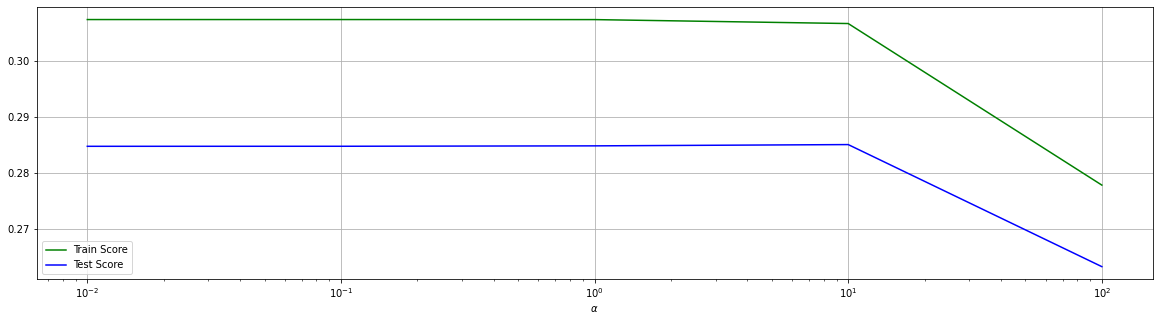

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.01, 0.1, 1, 10, 100]

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [29]:
print(train_score_list)
print(test_score_list)

[0.30740909159068963, 0.30740900895967116, 0.3074008790517977, 0.30669861278158705, 0.27787547606803353]
[0.2847967644194408, 0.2848045039663526, 0.2848769311690773, 0.2851051764164363, 0.263329746920131]


In [30]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.3074
Test score: 0.2848


In [31]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100, learning_rate = 'constant', eta0 = 0.05, shuffle = False)
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

-497785865486924.5
-874829685932074.9


We usually use the LinearRegression as a base model to evaluate other regression models. You have already fit a LinearRegression model on this dataset in Lab 3. Which of the following models with all default hyperparameters and random_state = 0 overperform LinearRegression model? Only consider the train score.

In [32]:
######  SGD Regressor

from sklearn.linear_model import SGDRegressor

sgd_regressor=SGDRegressor(random_state=0)
sgd_regressor.fit(X_train,y_train)
sgd_regressor.score(X_train,y_train)

0.30733867175425555

In [33]:
#######  Ridge
from sklearn.linear_model import Ridge
ridge=Ridge(random_state=0)
ridge.fit(X_train,y_train)
ridge.score(X_train,y_train)

0.3074008790517977

In [34]:
#### Lasso
from sklearn.linear_model import Lasso
lasso=Lasso(random_state=0)
lasso.fit(X_train,y_train)
lasso.score(X_train,y_train)

C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164342122.16352844, tolerance: 15811677.83887897
  model = cd_fast.enet_coordinate_descent(


0.3074090511029981

In [35]:
#### SVR

from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
svr.score(X_train,y_train)

-0.06274886053990736

In [36]:
#### Linear SVR
from sklearn.svm import LinearSVR
li_svc = LinearSVR()
li_svc.fit(X_train,y_train)
li_svc.score(X_train,y_train)

-6.960167957875847

In [37]:
##### Decision Tree Regressor 

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=2,random_state=0)
dtr.fit(X_train,y_train)
dtr.score(X_train,y_train)

0.34821063947130926

Fit a SVR model with kernel rbf. Which tuple can be considered as the best hyperparameters of this model?

In [38]:
c=[100,1000,10000]
gamma=[0.1,1,10]
train_svr_score=[]
test_svr_score=[]
best_c=None
best_gamma=None
best_score=0
for i in c:
    for g in gamma:
        svr=SVR(C=i,gamma=g)
        svr.fit(X_train,y_train)
        score=svr.score(X_train,y_train)
        if score>best_score:
            best_score=score
            best_c=i
            best_gamma=g
        train_svr_score.append(svr.score(X_train,y_train))
        test_svr_score.append(svr.score(X_test,y_test))
print("Highest Accuracy Score" , best_score)
print(best_c)
print(best_gamma)

Highest Accuracy Score 0.32015967662634204
10000
0.1


In [39]:
svr_best=SVR(C=10000,gamma=0.1)
svr_best.fit(X_train,y_train)
svr_best.score(X_test,y_test)

0.18782922009677705

In [40]:
from sklearn.tree import DecisionTreeRegressor
train_accuracy_score_dtr=[]
test_accuracy_score_dtr=[]

depth=[2,3,5,10,25]
for i in depth:
    dtr=DecisionTreeRegressor(max_depth=i,random_state=0)
    dtr.fit(X_train,y_train)
    train_accuracy_score_dtr.append(dtr.score(X_train,y_train))
    test_accuracy_score_dtr.append(dtr.score(X_test,y_test))

Text(0, 0.5, 'Accuracy')

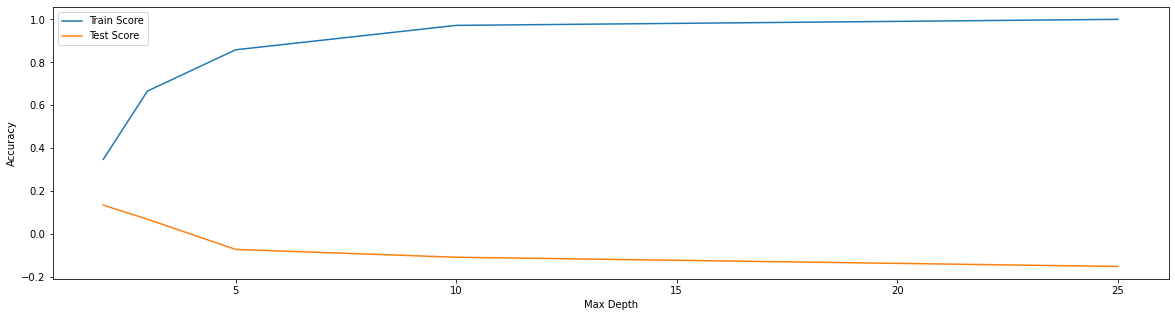

In [41]:
plt.subplots(figsize=(20,5))
plt.plot(depth, train_accuracy_score_dtr, label="Train Score")
plt.plot(depth, test_accuracy_score_dtr, label="Test Score")
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

In [42]:
dtr_max2 = DecisionTreeRegressor(random_state=0, max_depth=2)
dtr_max2.fit(X_train,y_train)
dtr_max2.score(X_test,y_test)

0.13478076724355503